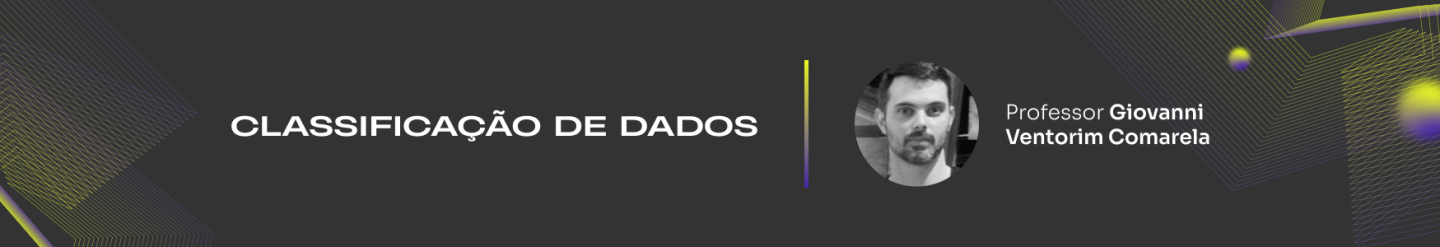

# Introdução à Biblioteca ``scikit-learn``

O objetivo dessa aula é apresentar a biblioteca ``scikit-learn``. Todo o código apresentado aqui é baseado na página da [própria biblioteca](https://scikit-learn.org).

A ``scikit-learn`` é uma biblioteca do Python amplamente utilizada para tarefas de aprendizado de máquina. Ela possui seis grandes módulos:
1. Classificação
2. Regressão
3. Agrupamento
4. Redução de dimensionalidade
5. Seleção de Modelos
6. Pré-processamento

Ao longo dessa disciplina, veremos, principalmente, conteúdos referentes aos Módulos (1), (5) e (6).

Na aula de hoje, com a finalidade de apresentar a versatilidade da biblioteca, vamos ver alguns exemplos relacionados aos Módulos (5) e (6):
- Padronização e Reescala
- Transformação de características categóricas
- Divisão do conjunto de dados

## Padronização e Reescala

Muitos algoritmos de aprendizado de máquina assumem que os dados de entrada estão organizados de uma maneira específica.
Por exemplo, para alguns algoritmos é importante que a média de cada coluna da matriz de dados seja zero. Para outros, é importante que as diferentes características do conjunto de dados estejam na mesma ordem de grandeza.

Dependendo de como os dados foram coletados e armazenados, este pode não ser o caso. Para resolver esse "problema", podemos utilizar a biblioteca ``scikit-learn`` para **padronizar** ou **reescalar** os dados.

Vamos ilustrar o que esses conceitos significam e como podem ser empregados por meio de um exemplo prático utilizando o dataset ``wine`` da biblioteca (que já vimos na Aula 01).

In [ ]:
#@title
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set()

Relembrando, na primeira parte do conjunto de dados, a matriz $\mathbf{X}$ contém várias amostras de vinhos, cada uma em uma representada em uma linha da matriz. Cada uma das 13 colunas de $\mathbf{X}$ representa uma **característica** dos vinhos analisados.

Além disso, cada amostra está relacionada a um tipo de vinho específico. Nesse conjunto de dados, há três tipos de vinhos, os quais estão representados em $\mathbf{y}$.

In [ ]:
wine = datasets.load_wine(return_X_y = False, as_frame = True)
X = wine.data
y = wine.target.values
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Observe que cada coluna da matriz de dados acima representa uma característica de uma amostra de vinho. Assim, cada coluna pode assumir valores em intervalos muito distintos das demais devido a:
1. Natureza ou concentração da característica medida; ou
2. Unidades de medidas utilizadas.

Vamos considerar as colunas ``nonflavanoid_phenols`` e ``proline`` como exemplos. Vejamos seus respectivos histogramas.

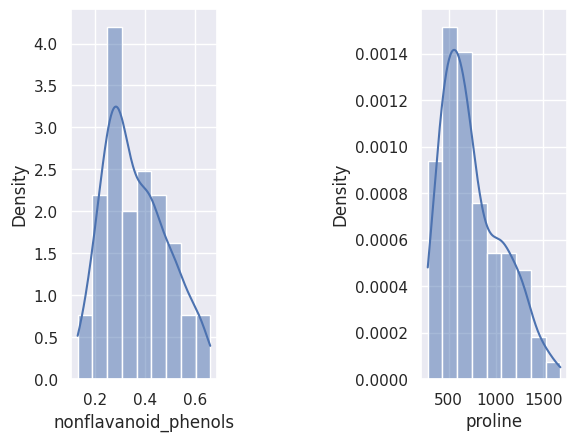

In [ ]:
#@title
plt.subplot(1, 3, 1)
sns.histplot(data = X, x = 'nonflavanoid_phenols', kde = True, stat = 'density');
plt.subplot(1, 3, 3)
sns.histplot(data = X, x = 'proline', kde = True, stat = 'density');

A coluna ``nonflavonoid_phenols`` assume valores pequenos, geralmente, menores que 1. Já a coluna ``proline`` assume valores muito grandes, geralmente de algumas centenas.

**Por que isso é relevante?**

Muitos algoritmos de aprendizado de máquina são baseados nas **distâncias** entre objetos do conjunto de dados.
Se colunas diferentes possuírem valores de ordens de grandeza muito diferentes (como no exemplo acima), isso pode prejudicar o desempenho de alguns algoritmos.

### Exemplo - Calculando a distância entre todos os objetos

Para ilustrar a problemática acima, vamos considerar a tarefa de calcular a distância euclidiana entre todos os pares de pontos do conjunto de dados.

**Definição - Distância Euclidiana**

Sejam $\mathbf{a}$ e $\mathbf{b}$ dois vetores do $\mathbb{R}^m$. A distância euclidiana entre $\mathbf{a}$ e $\mathbf{b}$ é dada por

$$d(\mathbf{a}, \mathbf{b}) = \sqrt{\sum_{i = 1}^m(a_i - b_i)^2}.$$

Vamos então computar a distância euclidiana **entre todos os pares de amostras** de vinho do conjunto ``wine``. Após isso, vamos observar a distribuição dos valores dessas distâncias por meio de um histograma.

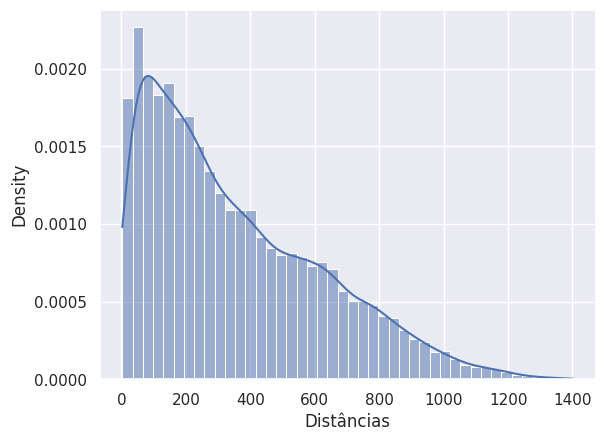

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist

distances = pdist(X, 'euclidean')
ax = sns.histplot(data = distances, stat = "density", kde = True);
ax.set(xlabel = 'Distâncias');

Pelo gráfio acima, pode-se perceber que, em geral, os valores das distâncias entre as amostras de vinho são relativamente altos.

Isso faz com que variações nas características com valores em intervalos menores (e.g., ``nonflavanoid_phenols`` e ``hue``) contribuam menos com as distâncias, mesmo que tais variações sejam significativas.

Esse fenômeno pode interferir no bom funcionamento de alguns algoritmos que veremos nas próximas aulas.

Para evitar problemas relacionados a características com diferentes ordens de grandeza, os dados devem ser transformados. A seguir, discutiremos duas alternativas.


### Padronização

A Padronização consiste em:
1. Centralizar cada coluna da matriz de dados, para que tenha média zero;
2. Dividir cada coluna da matriz de dados por um valor, para que tenha desvio padrão 1.

Na ``scikit-learn``, isso pode ser feito com a classe [``StandardScaler``](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

Vejamos um exemplo com o conjunto de dados ``wine``.

In [ ]:
from sklearn import preprocessing

# construindo o scaler para os dados
# with_mean: indica que os dados transformados terão média zero
# with_std: indica que os dados transformados terão desvio padrão 1
scaler = preprocessing.StandardScaler(with_mean = True, with_std = True)

# obtendo os parâmetros do scaler a partir do conjunto de dados
scaler.fit(X)

# transformando um conjunto de dados com o scaler obtido
X_scaled = scaler.transform(X)

# transformando os dados em pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


Veja que agora, todas as colunas da matriz possuem a mesma ordem de grandeza.

Isso pode ser confirmado observando estatísticas descritivas dos dados antes e após a padronização.

Antes da padronização.

In [ ]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Após a padronização.

In [ ]:
X_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16,-8.370333e-16,-3.991813e-17,-3.991813e-17,0.000000,-3.991813e-16,3.592632e-16,-1.197544e-16,2.494883e-17,1.995907e-16,3.193450e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-0.885468,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,0.095960,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,0.808997,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Vejamos também, o impacto que a padronização tem sobre as distâncias entre os pares de amostras.

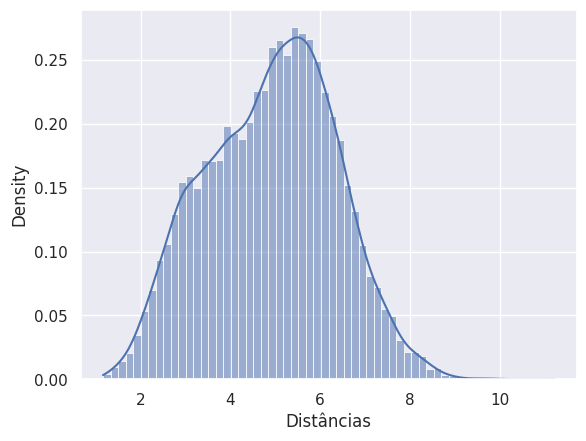

In [ ]:
distances = pdist(X_scaled, 'euclidean')
ax = sns.histplot(data = distances, stat = "density", kde = True);
ax.set(xlabel = 'Distâncias');

Após a padronização, as distâncias estão em um intervalo menor. Dessa forma, variações importantes em todas as características do conjunto de dados poderão impactar significativamente os valores das distâncias.

### Reescala

Na transformação por Reescala, o objetivo é transformar (**reescalar**) as características de um conjunto de dados de forma que cada uma assuma valores em um determinado intervalo.

Na ``scikit-learn``, uma forma de realizar a transformação por reescala é utilizando a classe [``MinMaxScaler``](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).

Como no caso anterior, vamos exemplificar como isso pode ser feito utilizando o conjunto de dados ``wine``.

In [ ]:
from sklearn import preprocessing

# construindo o scaler para os dados
# feature_range: indica o intervalo para o qual os dados devem ser transformados
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))

# obtendo os parâmetros do scaler a partir do conjunto de dados
scaler.fit(X)

# transformando um conjunto de dados com o scaler obtido
X_scaled = scaler.transform(X)

# transformando os dados em pandas DataFrame
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


As estatísticas descritivas dos dados transformados são dadas a seguir.

In [ ]:
X_scaled.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As distâncias dos dados transformados são dadas a seguir.

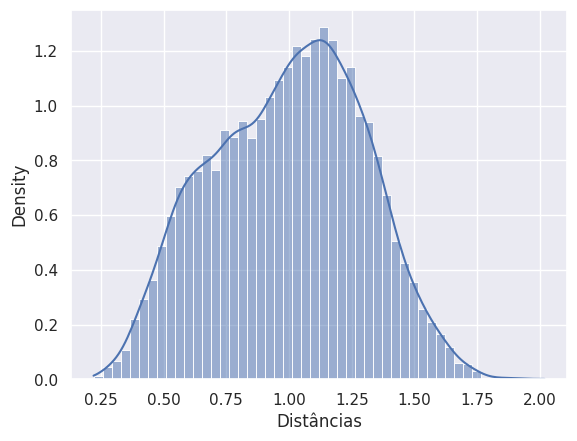

In [ ]:
distances = pdist(X_scaled, 'euclidean')
ax = sns.histplot(data = distances, stat = "density", kde = True);
ax.set(xlabel = 'Distâncias');

Assim como no caso da padronização, as distâncias estão em um intervalo menor. Dessa forma, variações importantes em todas as características do conjunto de dados poderão impactar significativamente os valores das distâncias.

## Transformação de Características Categóricas

Os conjuntos de dados utilizados como exemplo até o momento são 100% numéricos. Isso significa que todas as colunas (i.e., características) são valores reais.

Esse é um aspecto interessante de tais conjuntos de dados. Muitos algoritmos de aprendizado de máquina têm o requisito de que a entrada deve ser uma matriz de números reais.

No entanto, isso nem sempre é verdade. Considere, por exemplo, o conjunto de dados a seguir.

In [ ]:
penguins = sns.load_dataset('penguins');
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Esses dados representam informações sobre diversos pinguins.

As características ``bill_length_mm``, ``bill_depth_mm``, ``flipper_length_mm`` e ``body_mass_g`` são numérias. Por isso, podem ser transformadas, caso necessário, assim como nos exemplos anteriores.

No entanto, as características ``species``, ``island`` e ``sex`` assumem valores discretos de um pequeno conjunto de possibilidades.

Por exemplo, há pinguins de três espécies e de três ilhas.

In [ ]:
# valores únicos da coluna 'species'
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
# valores únicos da coluna 'island'
penguins.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

**E se quiséssemos calcular a distância euclidiana entre os vetores de características de dois pinguins?**

Bom, seria necessário codificar as *strings* das colunas acima em números! Há várias formas de fazer isso.

**Atenção**

Uma ideia natural seria simplesmente associar cada valor a um número inteiro. Por exemplo, para a coluna ``species``, poderíamos associar os valores ``Adelie``, ``Chinstrap`` e ``Gentoo`` aos números 0, 1 e 2, respectivamente. Dessa forma, a coluna ``species`` passaria a ser numérica.

Essa é uma prática que **não** deve ser feita. Isso se deve ao fato de que as distâncias entre objetos dependeriam dos números escolhidos para cada categoria. Como essa escolha é arbitrária, as distâncias também seriam!

### *One-hot Encoding*

A ideia de *one-hot* encoding é transformar uma característica categórica em várias características binárias.

No exemplo do conjunto de dados ``penguins``, a coluna ``species`` pode assumir três valores: ``Adelie``, ``Chinstrap`` e ``Gentoo``. Assim, a ideia é remover a coluna ``species`` e adicionar três novas colunas, uma para cada espécie de pinguin.

Essas novas colunas poderão apenas assumir valores binários. Os pinguins da espécie ``Adelie`` terão valor ``1`` na coluna ``Adelie`` e ``0`` nas outras duas. De forma análoga, pinguins da espécie ``Chinstrap`` terão valor ``1`` na coluna ``Chinstrap`` e ``0`` nas outras duas. E o mesmo será feito para os pinguins da espécie ``Gentoo``.

A biblioteca possui a classe [``OneHotEncoding``](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html) para essa finalidade.

O código a seguir exemplifica como isso pode ser feito e o resultado para as colunas ``species`` e ``island`` do conjunto de dados ``penguins``.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# fazendo uma cópia para não modificar o DataFrame original
penguins2 = penguins.copy()

# criando o encoder
encoder = OneHotEncoder(sparse_output = False)

# o encoder deve considerar apenas as colunas 'species' e 'island'
encoder.fit(penguins2[['species', 'island']])

# adicionando as novas colunas ao DataFrame
penguins2[encoder.get_feature_names_out()] = encoder.transform(penguins2[['species', 'island']])

penguins2

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0,0.0,0.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,0.0,0.0,1.0,1.0,0.0,0.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.0,0.0,1.0,1.0,0.0,0.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,0.0,0.0,1.0,1.0,0.0,0.0


Na saída acima, veja que o pinguim de índice ``0`` é da espécie ``Adelie`` e da ilha ``Torgersen``. Assim, esse pinguim tem valor ``1`` na nova coluna ``species_Adelie`` e ``0`` nas demais novas colunas que têm nome iniciando em ``species_``.

Similarmente, esse pinguim tem valor ``1`` na coluna ``island_Torgersen`` e ``0`` nas demais novas colunas que têm nome iniciando em ``island_``.

Por fim, podemos remover as colunas originais ``species`` e ``island``.

In [ ]:
# Removendo as colunas 'species' e 'island' do dataframe
penguins2.drop(columns = ['species'], inplace = True)
penguins2.drop(columns = ['island'], inplace = True)

penguins2

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0,0.0,0.0,1.0
1,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
2,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0
4,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0
340,46.8,14.3,215.0,4850.0,Female,0.0,0.0,1.0,1.0,0.0,0.0
341,50.4,15.7,222.0,5750.0,Male,0.0,0.0,1.0,1.0,0.0,0.0
342,45.2,14.8,212.0,5200.0,Female,0.0,0.0,1.0,1.0,0.0,0.0


Veja que o novo conjunto de dados teve as colunas ``species`` e ``island`` removidas. No entanto, ele ganhou seis novas colunas: três para a aplicação do ``OneHotEncoding`` na coluna ``species`` e mais três para a coluna ``island``.

## Outras transformações de interesse

Além das transformações mencionadas acima, a biblioteca ``scikit-learn`` possui várias outras funcionalidades para pré-processamento de dados. Algumas que valem destaque são:

1. [Imputação de valores faltantes](https://scikit-learn.org/1.5/modules/impute.html)

2. [Transformações robustas a *outliers*](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

3. [*Encoders* para dados ordinais](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)

4. [*Target Encoder*](https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.TargetEncoder.html)

De forma geral, recomenda-se a leitura do [módulo de pré-processamento](https://scikit-learn.org/1.5/api/sklearn.preprocessing.html) da biblioteca.

## Divisão do Conjunto de Dados

Quando criamos um modelo de classificação a partir de um conjunto de dados, é comum (**e uma boa prática**) reter uma pequena parte dos dados para testes.

A porção retida dos dados é conhecida como **conjunto de teste**. O restante do conjunto de dados é conhecido como **conjunto de treinamento**.

A ideia principal é que:
- Apenas o conjunto de treinamento deve ser utilizado no processo de construção dos modelos de classificação;
- **Nenhuma** informação do conjunto de teste deve ser utilizado para criar um modelo. Esse conjunto deve ser utilizado apenas para testar **modelos prontos**.


A biblioteca ``scikit-learn`` possui vários utilitários para divisão de conjuntos de dados em conjuntos de treinamento e teste. Um dois mais comuns é o método [``train_test_split``](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Vamos considerar, novamente, o conjunto de dados ``wine`` como exemplo.







In [ ]:
wine = datasets.load_wine(return_X_y = False, as_frame = True)
X = wine.data
y = wine.target.values

$\mathbf{X}$ representa a matriz que contém os vetores de características.

In [ ]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


$\mathbf{y}$ contém os rótulos reais (i.e., classes) de cada instância da matriz $\mathbf{X}$.

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Para dividirmos nosso conjunto de dados em porções para treinamento e teste, podemos proceder como na linha de código a seguir.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

Com isso, uma amostra aleatória de 30% dos dados é reservada para teste. Os vetores de características dessa amostra e seus respectivos rótulos estão nas variáveis ``X_test`` e ``y_test``.

O restante do conjunto de dados, i.e., a porção a ser utilizada para treinamento está nas variáveis ``X_train`` e ``y_train``.

In [ ]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
52,13.82,1.75,2.42,14.0,111.0,3.88,3.74,0.32,1.87,7.05,1.01,3.26,1190.0
113,11.41,0.74,2.50,21.0,88.0,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434.0
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
139,12.84,2.96,2.61,24.0,101.0,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
15,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0
20,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0


In [ ]:
y_train

array([0, 1, 0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 1, 0,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2,
       2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1,
       2, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0])

**Observação:** apesar de simples, a divisão entre conjuntos de treinamento e teste é uma tarefa extremamente importante para a construção de bons modelos de classificação.

O trecho de código acima será uma dos mais comuns no restante dessa disciplina!

## Em resumo

A biblioteca ``scikit-learn`` simplifica muito a vida das pessoas que desejam trabalhar aprendizado de máquina!

Nessa aula, vimos exemplos de técnicas de pré-processamento e divisão de conjuntos de dados.

Nas aulas seguintes, veremos como a biblioteca pode ajudar com o treinamento de vários classificadores populares e com vários aspectos experimentais importantes para o treinamento de bons modelos.